In [1]:
import tensorflow as tf

D:\Anaconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('data0.csv')
X = data.iloc[:,1:4805]
X = np.array(X)
print(X.shape)

(10, 4804)


In [3]:
tf.reset_default_graph()
num_features = 4804
reg = 0.01
epsilon = tf.constant(1e-3) #Batch norm parameter
decay = tf.constant(0.999) #For exponentially moving average

num_classes = 43

hidden_1 = 500 #layers in first hidden
hidden_2 = 100 #second layer

X_tf = tf.placeholder(name='X_tf',shape=[None,num_features],dtype=tf.float32)
y_tf = tf.placeholder(name='y_tf',shape=[None,num_classes],dtype=tf.float32)
is_train = tf.placeholder(name='is_train',dtype=tf.bool)

W1 = tf.get_variable(name='W1',shape=[num_features,hidden_1],initializer=tf.contrib.layers.xavier_initializer(seed=1))
b1 = tf.get_variable(name='b1',shape=[1,hidden_1],initializer=tf.zeros_initializer())
W2 = tf.get_variable(name='W2',shape=[hidden_1,hidden_2],initializer=tf.contrib.layers.xavier_initializer(seed=1))
b2 = tf.get_variable(name='b2',shape=[1,hidden_2],initializer=tf.zeros_initializer())
W3 = tf.get_variable(name='W3',shape=[hidden_2,num_classes],initializer=tf.contrib.layers.xavier_initializer(seed=1))
b3 = tf.get_variable(name='b3',shape=[1,num_classes],initializer=tf.zeros_initializer())

In [4]:
running_mean1 = tf.Variable(tf.zeros([hidden_1]),trainable=False)
running_var1 = tf.Variable(tf.zeros([hidden_1]))
running_mean2 = tf.Variable(tf.zeros([hidden_2]))
running_var2 = tf.Variable(tf.zeros([hidden_2]))
running_mean3 = tf.Variable(tf.zeros([num_classes]))
running_var3 = tf.Variable(tf.zeros([num_classes]))

scale1 = tf.Variable(tf.ones([hidden_1]))
beta1 = tf.Variable(tf.zeros([hidden_1]))
scale2 = tf.Variable(tf.ones([hidden_2]))
beta2 = tf.Variable(tf.zeros([hidden_2]))
scale3 = tf.Variable(tf.ones([num_classes]))
beta3 = tf.Variable(tf.zeros([num_classes]))

z1 = tf.matmul(X_tf,W1) + b1
z1_BN = tf.nn.batch_normalization(z1, running_mean1,running_var1,beta1, scale1,epsilon)

a1 = tf.nn.relu(z1_BN)

z2 = tf.matmul(a1,W2) + b2
z2_BN = tf.nn.batch_normalization(z2, running_mean2,running_var2,beta2, scale2,epsilon)  

a2 = tf.nn.relu(z2_BN)

z3 = tf.matmul(a2,W3) + b3
z3_BN = tf.nn.batch_normalization(z3, running_mean3,running_var3,beta3, scale3,epsilon)   

#No batch norm applied here
a3 = tf.nn.softmax(z3_BN)

y_hat = tf.argmax(a3,axis=1)

In [5]:
saver = tf.train.Saver()
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
saver.restore(sess,'tmp/model_bn.ckpt')

INFO:tensorflow:Restoring parameters from tmp/model_bn.ckpt


In [6]:
b = sess.run([running_mean1])
b

[array([ 5.12622714e-01,  2.92038590e-01, -5.53766906e-01,  7.30931580e-01,
        -1.18258262e+00,  2.57913005e-02,  1.64147124e-01, -1.48211226e-01,
         4.51042920e-01,  9.33458135e-02, -4.11662608e-01,  1.27359426e+00,
        -3.66280019e-01, -1.28213859e+00, -1.52457356e+00, -4.11600173e-01,
         6.82098031e-01,  5.28536320e-01, -1.99555993e-01,  1.34369218e+00,
        -3.49149853e-02,  7.87365288e-02, -3.76847088e-02,  6.29777968e-01,
         1.20478347e-01, -9.69993770e-01,  3.12695056e-01,  9.56477746e-02,
         5.93042420e-03,  8.86783898e-01,  4.96837169e-01, -7.82562613e-01,
         2.54166603e-01, -9.14248973e-02, -1.43820569e-01, -1.05968542e-01,
         8.75289917e-01, -8.55395421e-02,  3.41396332e-01, -4.51629758e-01,
         2.15623915e-01,  1.10529520e-01,  2.39767119e-01, -5.96147299e-01,
        -2.06718504e-01,  2.59191804e-02, -1.00176513e+00,  8.20228457e-03,
         5.57700932e-01,  1.19972616e-01,  3.14231932e-01,  1.17850518e+00,
        -8.8

0


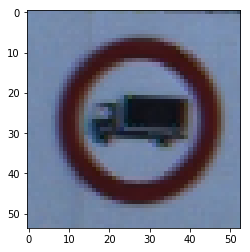

1


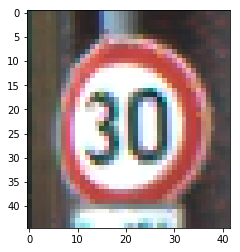

2


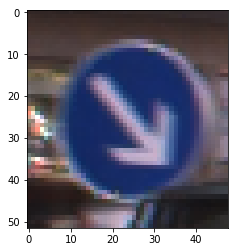

3


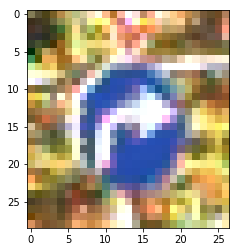

4


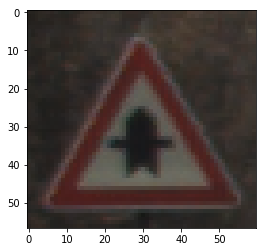

5


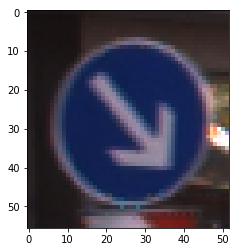

6


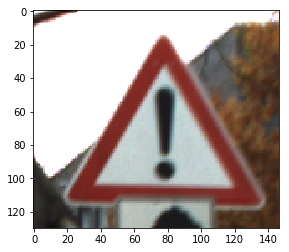

7


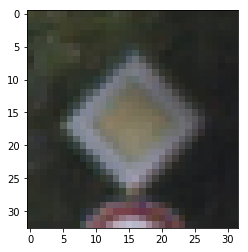

8


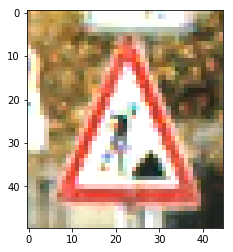

9


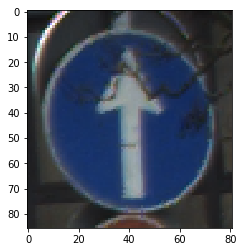

In [7]:
import cv2
import matplotlib.pyplot as plt

for i in range(10):
    print(i)
    img = plt.imread('Test/0000' + str(i) +  '.ppm',1)
    plt.imshow(img)
    plt.show()

In [8]:
pred = sess.run([y_hat],feed_dict={X_tf:X,is_train:False})
print(pred)

[array([26,  4,  0, 38, 16,  0, 36, 13,  6, 39], dtype=int64)]


In [8]:
# [array([14,  4,  0,  4,  6,  0,  6, 11,  6,  4], dtype=int64)]
# [array([26, 17,  0, 38, 16,  0, 36, 13,  6, 39], dtype=int64)]